Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 4th Semester                                           
Batch: I-3            
                                                                       Date: 4/2/2022       
Subject: ML
###Experiment-7

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
features=x.T
features.shape

(4, 150)

In [ ]:
cov_features=np.cov(features)
cov_features

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [ ]:
eig_val,eig_vec=np.linalg.eig(cov_features)
eig_vec

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [ ]:
eig_val

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [ ]:
eig_val[0]/sum(eig_val)

0.9246162071742685

In [ ]:
projected_x=x.dot(eig_vec.T[0])
projected_x

0      2.827136
1      2.795952
2      2.621524
3      2.764906
4      2.782750
         ...   
145    7.455360
146    7.037007
147    7.275389
148    7.412972
149    6.901009
Length: 150, dtype: float64

In [ ]:
PCA_df=pd.DataFrame(projected_x,columns=['PC1'])
PCA_df['y-axis']=0.0
PCA_df['label']=y

In [ ]:
PCA_df.head()

,PC1,y-axis,label
0,2.827136,0.0,Iris-setosa
1,2.795952,0.0,Iris-setosa
2,2.621524,0.0,Iris-setosa
3,2.764906,0.0,Iris-setosa
4,2.782750,0.0,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on Eigen Vector [0]')

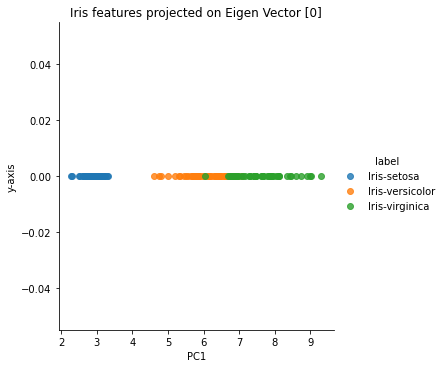

In [ ]:
sns.lmplot('PC1','y-axis',data=PCA_df,fit_reg=False,hue='label')
plt.title("Iris features projected on Eigen Vector [0]")

In [ ]:
#Considering Eigen Vector #2
eig_val[1]/sum(eig_val)

0.05301556785053501

In [ ]:
projected_x=x.dot(eig_vec.T[1])
projected_x

0     -5.641331
1     -5.145167
2     -5.177378
3     -5.003599
4     -5.648648
         ...   
145   -5.502139
146   -4.939703
147   -5.393243
148   -5.430600
149   -5.031837
Length: 150, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on Eigen Vector [1]')

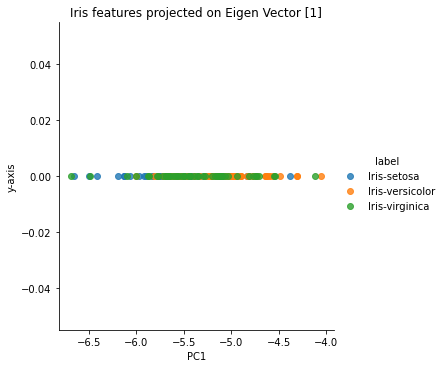

In [ ]:
PCA_df=pd.DataFrame(projected_x,columns=['PC1'])
PCA_df['y-axis']=0.0
PCA_df['label']=y
sns.lmplot('PC1','y-axis',data=PCA_df,fit_reg=False,hue='label')
plt.title("Iris features projected on Eigen Vector [1]")

In [ ]:
#Considering Eigen Vector #3
eig_val[2]/sum(eig_val)

0.01718513952500682

In [ ]:
projected_x=x.dot(eig_vec.T[2])
projected_x

0     -0.664277
1     -0.846287
2     -0.618056
3     -0.605093
4     -0.546535
         ...   
145   -0.463462
146   -0.763402
147   -0.511981
148    0.080108
149   -0.280447
Length: 150, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on Eigen Vector [2]')

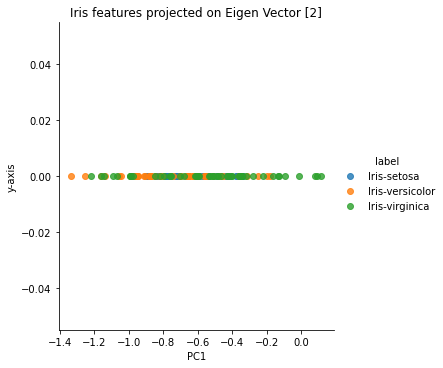

In [ ]:
PCA_df=pd.DataFrame(projected_x,columns=['PC1'])
PCA_df['y-axis']=0.0
PCA_df['label']=y
sns.lmplot('PC1','y-axis',data=PCA_df,fit_reg=False,hue='label')
plt.title("Iris features projected on Eigen Vector [2]")

In [ ]:
(eig_val[0]+eig_val[1])/sum(eig_val)

0.9776317750248035

In [ ]:
projected_x=x.dot(eig_vec.T[0]+eig_vec.T[1])
projected_x

0     -2.814195
1     -2.349214
2     -2.555855
3     -2.238694
4     -2.865898
         ...   
145    1.953221
146    2.097304
147    1.882146
148    1.982372
149    1.869172
Length: 150, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Iris features projected on Eigen Vector [0] & [1]')

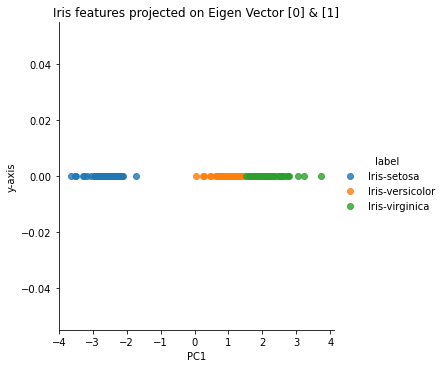

In [ ]:
PCA_df=pd.DataFrame(projected_x,columns=['PC1'])
PCA_df['y-axis']=0.0
PCA_df['label']=y
sns.lmplot('PC1','y-axis',data=PCA_df,fit_reg=False,hue='label')
plt.title("Iris features projected on Eigen Vector [0] & [1]")

#Conclusion:
1) Implemented PCA on Iris Dataset.   
2) Eigen vector having the max eigen value is considered as best for PCA as, the projections of datapoints on that vector will be wide.   

In [1]:
! jupyter nbconvert --to html I082_Shreyas_Dongre_ML_Prac7.ipynb

[NbConvertApp] Converting notebook I082_Shreyas_Dongre_ML_Prac7.ipynb to html
[NbConvertApp] Writing 371907 bytes to I082_Shreyas_Dongre_ML_Prac7.html
